## Customer profiling and Segmentation

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [108]:
user_df = pd.read_csv('userData.csv')

In [109]:
user_df.shape

(1742, 5)

In [110]:
kmeans = KMeans(n_clusters = 4)

## Segmenting Customers based on Recency

In [111]:
user_df.head(3)

,Unnamed: 0,UserId,Recency,Frequency,Revenue
0,0,378231,373,1,5
1,1,368508,373,1,171
2,2,377328,373,2,15


In [112]:
#Fitting the model
kmeans.fit(user_df[['Recency']])

KMeans(n_clusters=4)

In [113]:
user_df['RecencyCluster'] = kmeans.predict(user_df[['Recency']])

<AxesSubplot:>

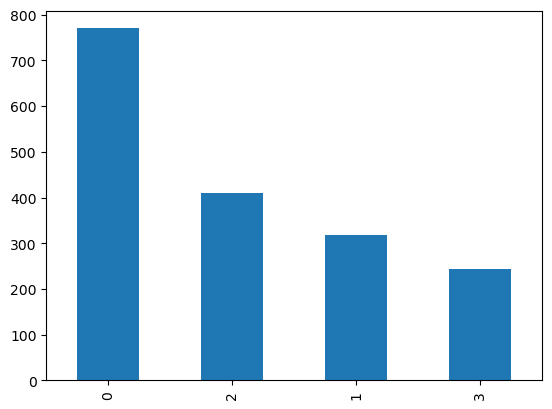

In [114]:
user_df['RecencyCluster'].value_counts().plot.bar()

In [115]:
#create a new dataframe by grouping the dataframe based on different cluster values and find the mean 
df_new = user_df.groupby('RecencyCluster')['Recency'].mean().reset_index()

In [116]:
df_new

,RecencyCluster,Recency
0,0,29.649351
1,1,210.846395
2,2,107.939024
3,3,319.123457


In [117]:
#df_new.rename(columns = {"Recency ":"RececyMean"}, inplace=True)

In [118]:
df_new.columns = ['RecencyCluster', 'RecencyMean']

In [119]:
df_new

,RecencyCluster,RecencyMean
0,0,29.649351
1,1,210.846395
2,2,107.939024
3,3,319.123457


In [120]:
df_new = df_new.sort_values(by = 'RecencyMean', ascending = False).reset_index(drop = True)
df_new

,RecencyCluster,RecencyMean
0,3,319.123457
1,1,210.846395
2,2,107.939024
3,0,29.649351


In [121]:
#Create a new column called index with the index values
df_new['RecencyScore'] = df_new.index

In [122]:
#Create a final dataframe by merging our original 
df_new

,RecencyCluster,RecencyMean,RecencyScore
0,3,319.123457,0
1,1,210.846395,1
2,2,107.939024,2
3,0,29.649351,3


In [126]:
#Create a final dataframe by merging our original dataframe and the new dataframe 
df_user = pd.merge(user_df, df_new[['RecencyCluster', 'RecencyScore']], on = 'RecencyCluster')
#Remove the column for cluster 
df_user.drop(columns =['RecencyCluster', 'Unnamed: 0'], axis = 1 , inplace =True )




In [127]:
df_user.head()

,UserId,Recency,Frequency,Revenue,RecencyScore
0,378231,373,1,5,0
1,368508,373,1,171,0
2,377328,373,2,15,0
3,333102,373,1,17,0
4,341754,373,1,10,0


In [130]:
df_user.groupby('RecencyScore')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyScore,,,,,,,,
0,243.0,319.123457,33.049443,266.0,291.0,315.0,353.5,373.0
1,319.0,210.846395,30.547492,161.0,184.0,211.0,239.0,264.0
2,410.0,107.939024,28.222894,70.0,82.0,105.0,134.0,159.0
3,770.0,29.649351,19.454436,0.0,14.0,28.0,44.0,68.0


In [131]:
#Segmenting customers based on frequency
kmeans.fit(df_user[['Frequency']])

KMeans(n_clusters=4)

In [132]:
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

<AxesSubplot:>

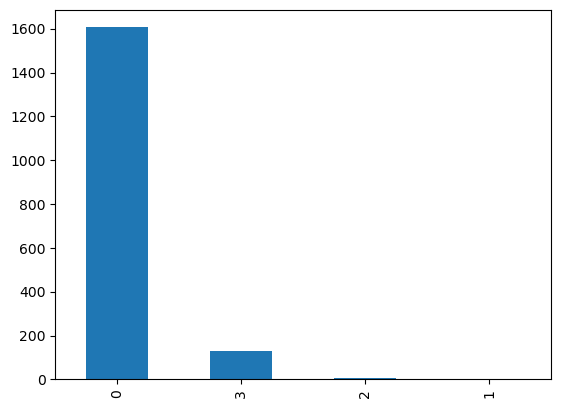

In [133]:
#Plotting the counts of data in each cluster
df_user['FrequencyCluster'].value_counts().plot.bar()

In [134]:
#Ordering cluster numbers
def order_cluster(cluster_name, column_name, df,ascending):
    """
    Order clusters based on their mean values
    """
    #create a new dataframe by grouping the dataframe based on different cluster values and find the 
    df_new = df.groupby(cluster_name)[column_name].mean().reset_index()
    
    #sort the values
    df_new = df_new.sort_values(by=column_name, ascending = ascending).reset_index(drop=True)
    #Creat a new column with the index values as score
    new_column = column_name + 'Score'
    df_new[new_column] = df_new.index
    
    #Create a final dataframe by merging our original dataframe and the new dataframe
    df_final = pd.merge(df, df_new[[cluster_name, new_column]], on=cluster_name)
    
    #Remove the column for cluster
    df_final.drop(cluster_name, axis=1, inplace=True)
    
    return df_final

    
    

In [135]:
df_user = order_cluster('FrequencyCluster', 'Frequency', df_user, True)


In [136]:
df_user.head()

,UserId,Recency,Frequency,Revenue,RecencyScore,FrequencyScore
0,378231,373,1,5,0,0
1,368508,373,1,171,0,0
2,377328,373,2,15,0,0
3,333102,373,1,17,0,0
4,341754,373,1,10,0,0


In [137]:
df_user.groupby('FrequencyScore')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyScore,,,,,,,,
0,1606.0,1.618929,0.884897,1.0,1.0,1.0,2.0,4.0
1,130.0,7.330769,3.204620,5.0,5.0,6.0,8.0,17.0
2,5.0,46.200000,15.006665,29.0,39.0,43.0,51.0,69.0
3,1.0,1175.000000,NaN,1175.0,1175.0,1175.0,1175.0,1175.0


In [125]:
"""
Customer profiling and segmentation is a way to learn about the characteristics of customers

Understanding and grouping your customers aids in servicing their needs better which in turn helps in the growth of the business

A common method to profile and segment customers in any business is to look at their amount, recency and frequency of purchase.

Recency(R): the most recent purchase within a time frame
Frequency(f): the number of purchases within a time frame
Monetary value (M) : the total value of purchase amount 1.e The revenue with a time frame 


Low value : less active than others, not very frequent buyer/ visitor and generates very low or no revenue

Mid Value: Moderately active, less frequent buyer/ visitor and generates moderate revenue

High value : highly valuable group of customers taht are very active frequent buyer / visitor and generate high revenue

Advantage of customer profiling and segmentation 
1	Identify the value of customers
2	Improve marketing strategies
3	Predict future purchase patterns
4	Develop better products/services etc

"""

'\nCustomer profiling and segmentation is a way to learn about the characteristics of customers\n\nUnderstanding and grouping your customers aids in servicing their needs better which in turn helps in the growth of the business\n\nA common method to profile and segment customers in any business is to look at their amount, recency and frequency of purchase.\n\nRecency(R): the most recent purchase within a time frame\nFrequency(f): the number of purchases within a time frame\nMonetary value (M) : the total value of purchase amount 1.e The revenue with a time frame \n\n\nLow value : less active than others, not very frequent buyer/ visitor and generates very low or no revenue\n\nMid Value: Moderately active, less frequent buyer/ visitor and generates moderate revenue\n\nHigh value : highly valuable group of customers taht are very active frequent buyer / visitor and generate high revenue\n\nAdvantage of customer profiling and segmentation \n1\tIdentify the value of customers\n2\tImprove m